In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt

# set the CARMA model parameters
sigmay = 2.3  # dispersion in the time series
p = 5  # order of the AR polynomial
mu = 17.0  # mean of the time series
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0])  # widths of of Lorentzian components
qpo_cent = np.array([1.0/5.0, 1.0/25.0])  # centroids of Lorentzian components
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) # compute the roots r_k from the Lorentzian function parameters
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
# convert CARMA model variance to variance in the driving white noise
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)  # ca

Text(0,0.5,'Magnitud')

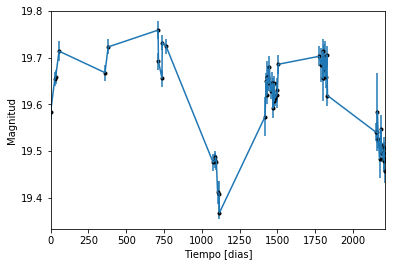

In [2]:
data = np.genfromtxt('LC_G_99669.dat')
juldate = data[:,0]  # time is given by the julian date
t = juldate - juldate.min()  # set first time value to zero for convenience. units of t are days.
y = data[:,1]  # i-band magnitudes
yerr = data[:,2]  # standard deviation in the measurement noise

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

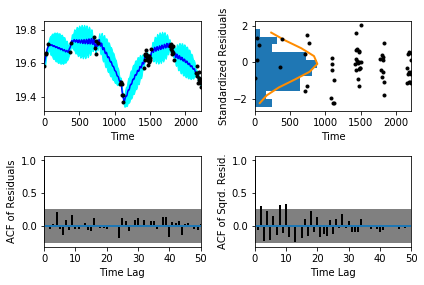

In [5]:
sample.assess_fit()

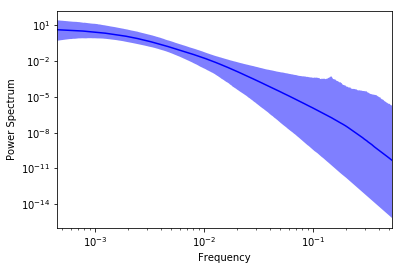

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

NameError: name 'noise_level' is not defined

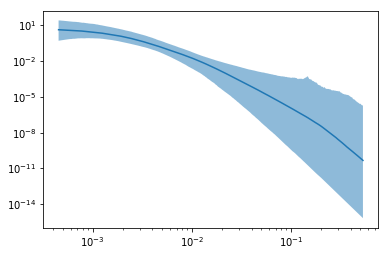

In [7]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

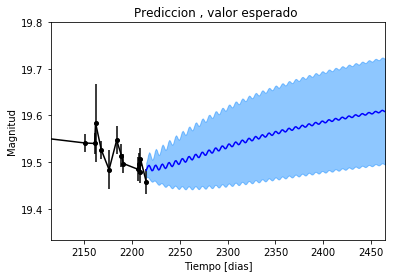

In [8]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

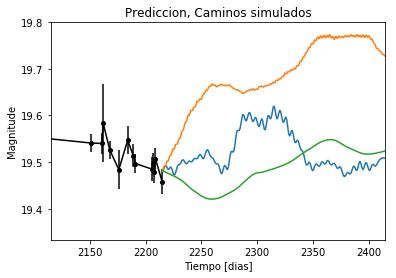

In [9]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 3
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  # use a random draw of the CARMA parameters from its posterior
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


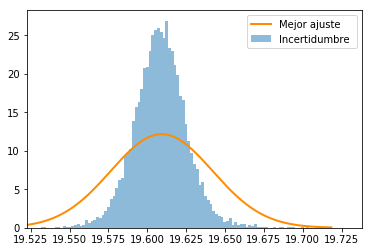

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

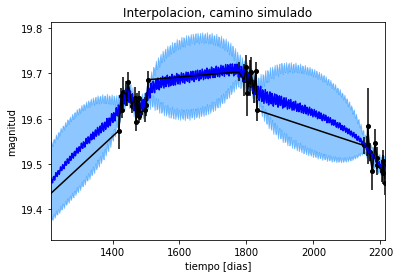

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

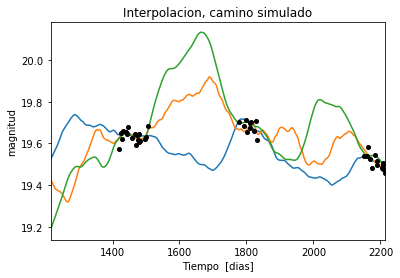

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 3
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [15]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 291.657265525
Median: 0.00209603796763
Standard deviation: 0.258816312418
68% credibility interval: [ 0.          0.37589058]
95% credibility interval: [ 0.          0.92596657]
99% credibility interval: [ 0.          1.01898679]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 291.657265525
Median: 0.00209603796763
Standard deviation: 0.258816312418
68% credibility interval: [ 0.          0.37589058]
95% credibility interval: [ 0.          0.92596657]
99% credibility interval: [ 0.          1.01898679]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 6122.23817839
Median: 0.0
Standard deviation: 0.000567600971089
68% 

Plotting parameter summary


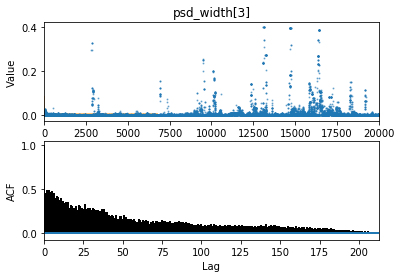

In [16]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [17]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1787.99532058
Median: 129.914490277
Standard deviation: 1.78088943995
68% credibility interval: [ 127.94065463  131.20182629]
95% credibility interval: [ 125.40604833  132.2732566 ]
99% credibility interval: [ 123.4143225   133.51444988]


In [19]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [20]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 251.448779522
Median: 0.833386492829
Standard deviation: 2.21934046988
68% credibility interval: [ 0.10561906  4.11595556]
95% credibility interval: [ 0.0313964   7.35111105]
99% credibility interval: [  0.01910711  10.21050672]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 596.386392418
Median: 0.677237045938
Standard deviation: 9.58257461925
68% credibility interval: [ 0.02505035  9.1112478 ]
95% credibility interval: [  2.90220720e

In [21]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [22]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 18319.3201159
Median: 1.74139988219e-29
Standard deviation: 1.07160085495e+66
68% credibility interval: [  1.79625779e-67   9.23051785e+12]
95% credibility interval: [  5.93019494e-118   1.06914755e+052]
99% credibility interval: [  4.89954939e-128   1.59109484e+062]


In [23]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [24]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1396.17921653
Median: 19.6130388331
Standard deviation: 0.0605862842043
68% credibility interval: [ 19.56227467  19.65965024]
95% credibility interval: [ 19.47229667  19.72372616]
99% credibility interval: [ 19.39820247  19.79013665]


In [25]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [26]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 291.657265525
Median: 0.00209603796763
Standard deviation: 0.258816312418
68% credibility interval: [ 0.          0.37589058]
95% credibility interval: [ 0.          0.92596657]
99% credibility interval: [ 0.          1.01898679]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 291.657265525
Median: 0.00209603796763
Standard deviation: 0.258816312418
68% credibility interval: [ 0.          0.37589058]
95% credibility interval: [ 0.          0.92596657]
99% credibility interval: [ 0.          1.01898679]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 6122.23817839
Median: 0.0
Standard deviation: 0.000567600971089
68% 

In [27]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [28]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1787.99532058
Median: 129.914490277
Standard deviation: 1.78088943995
68% credibility interval: [ 127.94065463  131.20182629]
95% credibility interval: [ 125.40604833  132.2732566 ]
99% credibility interval: [ 123.4143225   133.51444988]


In [29]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [30]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 503.479915235
Median: 0.0143876674531
Standard deviation: 0.210096020001
68% credibility interval: [ 0.0015036   0.23907453]
95% credibility interval: [  5.18865079e-04   7.91558822e-01]
99% credibility interval: [  4.63872038e-04   9.95230315e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 571.366449693
Median: 0.00225304981235
Standard deviation: 0.0922291704842
68% credibility interval: [ 0.00067718  0.0252012 ]
95% credibility interval: [ 0.00047641  0.30287432]
99% credibility interval: [  4.55557809e-04   6.08454642e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 556.690555874
Median: 0.0197504260936
Standard 

In [31]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [32]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1642.78381765
Median: 0.01545256635
Standard deviation: 0.0189653739901
68% credibility interval: [ 0.00924742  0.03047951]
95% credibility interval: [ 0.00582278  0.06567872]
99% credibility interval: [ 0.00457736  0.12260923]


In [33]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [34]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 895.857634716
Median: 1.17146695288
Standard deviation: 0.20095256275
68% credibility interval: [ 0.98563879  1.37970999]
95% credibility interval: [ 0.83635372  1.62086467]
99% credibility interval: [ 0.71770051  1.78700117]


In [35]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [36]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 418.507226619
Median: 0.000349914483568
Standard deviation: 0.090379135462
68% credibility interval: [  1.48190499e-17   1.04804764e-02]
95% credibility interval: [  1.01075309e-55   1.46020820e-01]
99% credibility interval: [  4.62255871e-67   6.93473767e-01]


In [37]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [38]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 503.479915235
Median: (-0.090400380746-1.63659970918j)
Standard deviation: 2.09453750673
68% credibility interval: [-1.50214956+0.j -0.00944743+0.j]
95% credibility interval: [ -4.97351076e+00+0.j          -3.26012544e-03-2.31478404j]
99% credibility interval: [ -6.25321649e+00+0.j          -2.91459397e-03-1.37238765j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 571.366449693
Median: (-0.0141563294773+0.589046057096j)
Standard deviation: 1.7263570854
68% credibility interval: [-0.15834380+0.70884569j -0.00425482+0.j        ]
95% credibility interval: [-1.90301551+2.59156302j -0.00299335+0.j        ]
99% credibility interval: [ -3.82303327e+00+3.6839086j  -2.86235413e-03+0.j       ]
Posterior summary for parameter a

Plotting 2d PDF w KDE


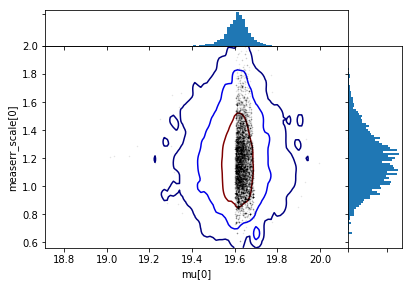

In [39]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


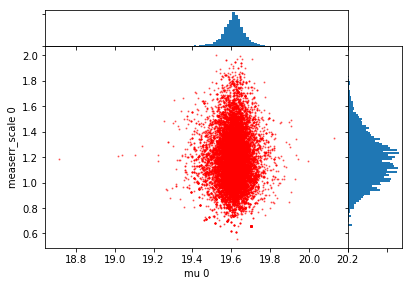

In [40]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


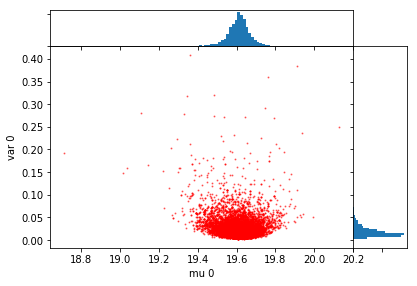

In [41]:
sample.plot_2dpdf('mu', 'var', doShow=True)

Plotting 2d PDF w KDE


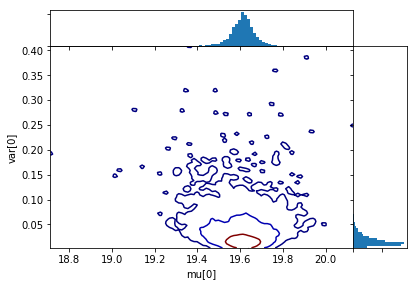

In [42]:
sample.plot_2dkde('mu', 'var', doShow=True)